## Imports and Settings

In [1]:
# Import 
#import therpy as tp
import os
import pickle
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from ipywidgets import interact
import numpy as np
import matplotlib.animation as animation
import matplotlib.patches as patches
from scipy import ndimage
#from breadboard import BreadboardClient
import ipywidgets as widgets
import datetime

import skimage
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import data
from skimage.transform import swirl
from scipy.optimize import curve_fit


#cst = tp.cst()
#cst._fill_physical_constants
#cstNa = tp.cst(atom='NaD2')
#cstLi = tp.cst(atom='LiD2')

pd.options.mode.chained_assignment = None  # default='warn'

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)   # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

# username = 'Fermi3 Controller'
# username = 'Fermi3 Analyzer'
# username = 'mailb'
# bc = BreadboardClient(config_path='C:\\Users\\'+ username +'\\Documents\\My Programs\\API_CONFIG_fermi3.json')
# bc = BreadboardClient(config_path='D:\\User\Documents\\My Programs\\API_CONFIG_fermi3.json')
#bc = BreadboardClient(config_path='API_CONFIG_fermi3.json')

# Data Analysis

## Preprocess Data

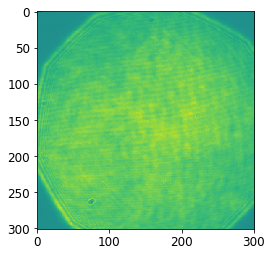

In [4]:
import csv
# Read imagenames
data1=np.genfromtxt('file1.csv',delimiter=',')
plt.imshow(data1,clim=[-9,9])

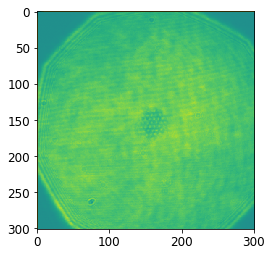

In [5]:
data2=np.genfromtxt('file2.csv',delimiter=',')
plt.imshow(data2,clim=[-9,9])

Text(0, 0.5, 'y')

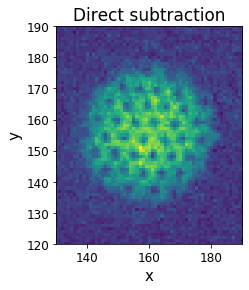

In [6]:
plt.imshow(data1-data2)
plt.xlim([130,190])
plt.ylim([120,190])
plt.title("Direct subtraction")
plt.xlabel("x")
plt.ylabel("y")

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


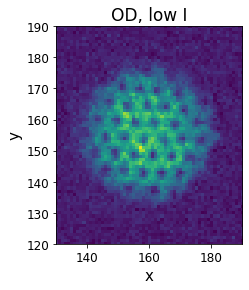

In [7]:
## More processing and OD

data1=np.genfromtxt('file1.csv',delimiter=',')
data2=np.genfromtxt('file2.csv',delimiter=',')

np.nan_to_num(data1,copy=False,nan=7,posinf=1e6,neginf=-1e6)
np.nan_to_num(data1,copy=False,nan=7,posinf=1e6,neginf=-1e6)

for i in range(len(data1)):
    for j in range(len(data1)):
        if abs(data1[i][j])==0: data1[i][j]==1e-6
        if abs(data2[i][j])==0: data2[i][j]==1e-6


OD=-np.log(data2/data1)
plt.imshow(OD,clim=[0,1])
plt.title("OD, low I")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([130,190])
plt.ylim([120,190]);



mean: -0.00034920341870975537


C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


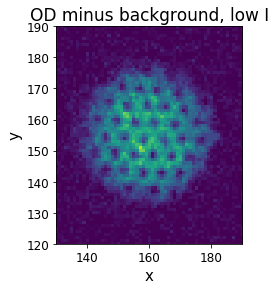

In [9]:
#import
data1=np.genfromtxt('file1.csv',delimiter=',')
data2=np.genfromtxt('file2.csv',delimiter=',')

#Window location, x[225,275], y[50,100]

#no-atoms average background
noatomavg=np.mean(data1[50:100,225:275])

#with-atoms average background
withatomavg=np.mean(data2[50:100,225:275])

#Scale no-atoms to with-atoms
data1=data1/noatomavg*withatomavg

#OD processing
np.nan_to_num(data1,copy=False,nan=7,posinf=1e6,neginf=-1e6)
np.nan_to_num(data1,copy=False,nan=7,posinf=1e6,neginf=-1e6)

for i in range(len(data1)):
    for j in range(len(data1)):
        if abs(data1[i][j])==0: data1[i][j]==1e-6
        if abs(data2[i][j])==0: data2[i][j]==1e-6


OD=-np.log(data2/data1)
plt.imshow(OD,clim=[0,1])
plt.title("OD minus background, low I")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([130,190])
plt.ylim([120,190]);

print('mean: '+str(np.mean(OD[50:100,225:275])))

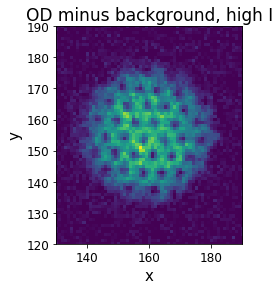

In [10]:
# Now consider the high-intensity imaging regime!! https://arxiv.org/abs/1702.01943
linear_term=(data1-data2)/41;
#3000 comes from expression 3 in the paper
# camera https://www.pco.de/fileadmin/user_upload/db/products/datasheet/sensicam_qe_20080624.pdf
#Na has isat=6.3mW/cm^2, QE is 0.65, A=(6.34micron)^2, hc/lambda = 2.105 eV, T=0.8, M=750/31, G=2, 3micros exposure


OD=OD+linear_term;
plt.imshow(OD,clim=[0,1])
plt.title("OD minus background, high I")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([130,190])
plt.ylim([120,190]);

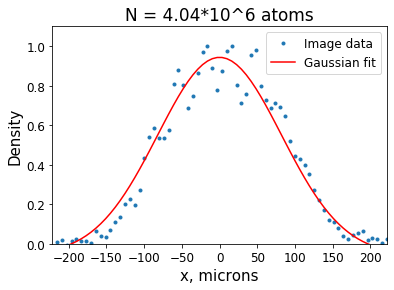

In [11]:
# Divide OD by the on-resonance scattering cross section to get density
cross_sec=3*(589*10**-9)/2*np.pi;
density=OD/cross_sec;

# Fit a cut to a 1D TF profile / Gaussian profile. Can integrate y or just take a slice.
#This is the 'integration'. NEED TO NORMALIZE!!!

cut=[];
for i in range(120,190):
    cut.append(np.average(density[i,120:190]));

np.array(cut);
cutlen=len(cut);
radial=(np.linspace(0,cutlen,cutlen)-cutlen/2)*6.34*10**-6;

plt.plot(radial*10**6,cut/max(cut),'.',label='Image data')


def Gauss_func(x,a,b,c):
    return a+b*np.exp(-c*x**2)

from scipy.optimize import curve_fit


poptG, pcovG = curve_fit(Gauss_func, radial, cut)
plt.plot(radial*10**6, Gauss_func(radial, *poptG)/max(cut), 'r-',
         label='Gaussian fit')

#Now extract atom number. N=abar/a_scatt*(Rbar/abar/1.719)^5
a0=0.529*10**-9;
scattering_len=65*a0;
mass=3.82*10**-26;
hbar=1.05*10**-34;
wbar=(np.sqrt(8)*2*np.pi*85)**(1/3);
abar=np.sqrt(hbar/mass/wbar);

Rbar=np.sqrt(2/poptG[2]);

Natom=abar/scattering_len*(Rbar/abar/1.719)**5;


plt.legend()
plt.xlabel('x, microns')
plt.ylabel('Density')
plt.xlim([min(radial)*10**6,max(radial)*10**6])
plt.ylim([0,1.1])
plt.title('N = '+str(round(Natom/10**6,2))+"*10^6 atoms")
plt.show();

